CRR reference: 6.088810110703037
5000 6.078815663884607 diff: -0.009994446818429203
20000 6.100567473985082 diff: 0.011757363282045574
100000 6.040536503442651 diff: -0.04827360726038599
200000 6.0502753760085985 diff: -0.03853473469443802


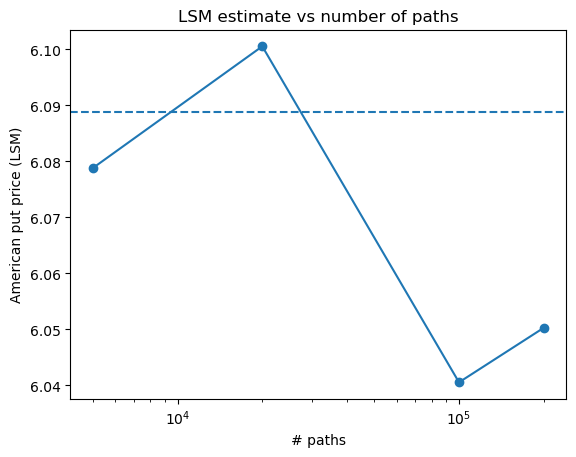

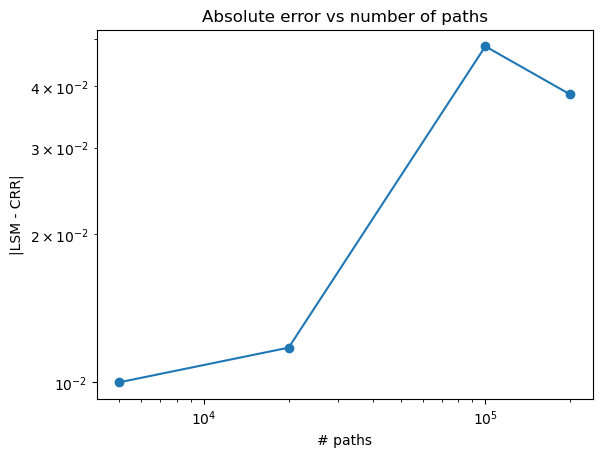

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mcop.simulate_paths import simulate_gbm_paths
from mcop.american_lsm import american_option_lsm
from mcop.binomial_tree import american_option_crr

S0, K, r, q, sigma, T = 100.0, 100.0, 0.05, 0.0, 0.2, 1.0
n_steps = 100
seed = 123

ref = american_option_crr(S0, K, r, sigma, T, n_steps=500, is_call=False, q=q)
print("CRR reference:", ref)

path_grid = np.array([5_000, 20_000, 100_000, 200_000])

ests = []
for n_paths in path_grid:
    paths = simulate_gbm_paths(S0, r, sigma, T, n_steps, int(n_paths), q=q, seed=seed, antithetic=True)
    est = american_option_lsm(paths, K, r, T, is_call=False, degree=2, q=q)
    ests.append(est)
    print(int(n_paths), est, "diff:", est - ref)

ests = np.array(ests)
diffs = ests - ref

# Plot 1: estimate vs paths
plt.figure()
plt.plot(path_grid, ests, marker="o")
plt.axhline(ref, linestyle="--")
plt.xscale("log")
plt.xlabel("# paths")
plt.ylabel("American put price (LSM)")
plt.title("LSM estimate vs number of paths")
plt.show()

# Plot 2: absolute error vs paths
plt.figure()
plt.plot(path_grid, np.abs(diffs), marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("# paths")
plt.ylabel("|LSM - CRR|")
plt.title("Absolute error vs number of paths")
plt.show()